In [1]:
!git clone https://github.com/xamshu/Smart-Dustbin.git

Cloning into 'Smart-Dustbin'...
remote: Enumerating objects: 24760, done.
remote: Total 24760 (delta 0), reused 0 (delta 0), pack-reused 24760
Receiving objects: 100% (24760/24760), 207.36 MiB | 15.94 MiB/s, done.
Checking out files: 100% (25077/25077), done.


In [2]:


import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)



In [3]:
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [4]:
IMAGE_SIZE = [224, 224]

train_path = "/content/Smart-Dustbin/DATASET/TRAIN/"
valid_path = "/content/Smart-Dustbin/DATASET/TEST/"

In [5]:
# Import the Resnet50 architecture
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [6]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
#Class ko number Finding

In [7]:
folders = glob('/content/Smart-Dustbin/DATASET/TRAIN/*')

In [9]:
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
#Augumentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#Creating training dataset

In [14]:
training_set = train_datagen.flow_from_directory('/content/Smart-Dustbin/DATASET/TRAIN/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 22564 images belonging to 2 classes.


In [ ]:
#Creating testing dataset

In [15]:
test_set = test_datagen.flow_from_directory('/content/Smart-Dustbin/DATASET/TEST/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 2513 images belonging to 2 classes.


In [ ]:
#Creating a model checkpoint

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
MODEL_DIR = "/content/Smart-Dustbin/"

if not os.path.exists(MODEL_DIR):  #If the directory does not exist, create it.
    os.makedirs(MODEL_DIR)
checkpoint = ModelCheckpoint(filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"), save_best_only=True) 


In [ ]:
#Fitting the model

In [16]:
#fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
706/706 [==============================] - 290s 392ms/step - loss: 0.8163 - accuracy: 0.6828 - val_loss: 0.6201 - val_accuracy: 0.7437
Epoch 2/20
706/706 [==============================] - 268s 380ms/step - loss: 0.6391 - accuracy: 0.7387 - val_loss: 0.5511 - val_accuracy: 0.7772
Epoch 3/20
706/706 [==============================] - 265s 376ms/step - loss: 0.6523 - accuracy: 0.7411 - val_loss: 0.5887 - val_accuracy: 0.8074
Epoch 4/20
706/706 [==============================] - 265s 376ms/step - loss: 0.7105 - accuracy: 0.7401 - val_loss: 0.7878 - val_accuracy: 0.6844
Epoch 5/20
706/706 [==============================] - 266s 376ms/step - loss: 0.6045 - accuracy: 0.7670 - val_loss: 0.5730 - val_accuracy: 0.7875
Epoch 6/20
706/706 [==============================] - 269s 381ms/step - loss: 0.5649 - accuracy: 0.7748 - val_loss: 0.5353 - val_accuracy: 0.7891
Epoch 7/20
706/706 [==============================] - 266s 376ms/step - loss: 0.6123 - accuracy: 0.7698 - val_loss: 0.6460 -

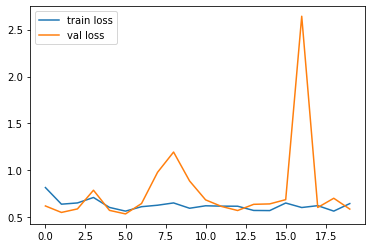

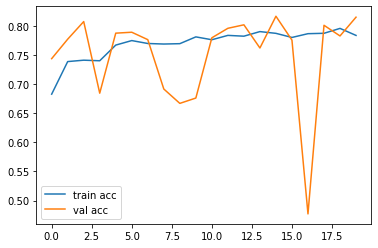

In [17]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss_eff')

# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc_eff')


In [ ]:
#Saving the model

In [18]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [19]:
from tensorflow.keras.models import load_model

model.save('resnet.h5')


In [ ]:
#Predicting the model

In [20]:
y_pred = model.predict(test_set)
y_pred

array([[0.0481074 , 0.9518926 ],
       [0.7053747 , 0.2946253 ],
       [0.8696703 , 0.13032973],
       ...,
       [0.00875678, 0.99124324],
       [0.7224297 , 0.27757028],
       [0.993323  , 0.00667701]], dtype=float32)

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
#Loading the model to do predictions

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('resnet.h5')

In [ ]:
#checking the Predictions using validation dataset

In [24]:
# test data to check model and predict 
img = image.load_img('/content/Smart-Dustbin/DATASET/TEST/O/O_12577.jpg', target_size = (224, 224))

In [25]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
result = model.predict(img)

In [26]:


training_set.class_indices



{'O': 0, 'R': 1}

In [27]:
if result[0][0] == 1:
    prediction = 'Inorganic'
else:
    prediction = 'Organic'

In [28]:


prediction



'Organic'